In [1]:
#Loading Required Libraries
import pandas as pd
import numpy as np

In [2]:
#Load the Dataset
file_path = r"C:\Users\tanzi\Personal Projects\Crime-analysis-and-prediction\crime-analysis-and-prediction\data\raw_data.csv"
df = pd.read_csv(file_path)

In [3]:
#Viewing the structure of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [4]:
#Checking the name of the columns
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [5]:
#Renaming Columns with Meaningful Names
df.rename(columns={
    'DR_NO': 'report_id',
    'Date Rptd': 'date_reported',
    'DATE OCC': ' date_of_occurrence',
    'TIME OCC': 'time_of_occurrence',
    'AREA': 'area_code',
    'AREA NAME': 'area_name',
    'Rpt Dist No': 'report_dist_no',
    'Part 1-2': 'part_1_2',
    'Crm Cd': 'crime_code',
    'Crm Cd Desc': 'crime_code_description',
    'Mocodes': 'mo_codes',
    'Vict Age': 'victim_age',
    'Vict Sex': 'victim_sex',
    'Vict Descent': 'victim_descent',
    'Premis Cd': 'premises_code',
    'Premis Desc': 'premises_description',
    'Weapon Used Cd': 'weapon_used_code',
    'Weapon Desc': 'weapon_description',
    'Status': 'case_status',
    'Status Desc': 'case_status_description',
    'Crm Cd 1': 'crime_code_1',
    'Crm Cd 2': 'crime_code_2',
    'Crm Cd 3': 'crime_code_3',
    'Crm Cd 4': 'crime_code_4',
    'LOCATION': 'location',
    'Cross Street': 'cross_street',
    'LAT': 'latitude',
    'LON': 'longitude'
}, inplace=True)

In [6]:
#Checking the name of the columns
print(df.columns)

Index(['report_id', 'date_reported', ' date_of_occurrence',
       'time_of_occurrence', 'area_code', 'area_name', 'report_dist_no',
       'part_1_2', 'crime_code', 'crime_code_description', 'mo_codes',
       'victim_age', 'victim_sex', 'victim_descent', 'premises_code',
       'premises_description', 'weapon_used_code', 'weapon_description',
       'case_status', 'case_status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   report_id                1004876 non-null  int64  
 1   date_reported            1004876 non-null  object 
 2    date_of_occurrence      1004876 non-null  object 
 3   time_of_occurrence       1004876 non-null  int64  
 4   area_code                1004876 non-null  int64  
 5   area_name                1004876 non-null  object 
 6   report_dist_no           1004876 non-null  int64  
 7   part_1_2                 1004876 non-null  int64  
 8   crime_code               1004876 non-null  int64  
 9   crime_code_description   1004876 non-null  object 
 10  mo_codes                 853279 non-null   object 
 11  victim_age               1004876 non-null  int64  
 12  victim_sex               860267 non-null   object 
 13  victim_descent           860255 non-null  

In [8]:
#Converting Date Columns to Datetime Format
df["date_reported"] = pd.to_datetime(df["date_reported"], errors="coerce")
df["date_of_occurrence"] = pd.to_datetime(df[" date_of_occurrence"], errors="coerce")

C:\Users\tanzi\AppData\Local\Temp\ipykernel_19520\4235244095.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_reported"] = pd.to_datetime(df["date_reported"], errors="coerce")
C:\Users\tanzi\AppData\Local\Temp\ipykernel_19520\4235244095.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_of_occurrence"] = pd.to_datetime(df[" date_of_occurrence"], errors="coerce")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   report_id                1004876 non-null  int64         
 1   date_reported            1004876 non-null  datetime64[ns]
 2    date_of_occurrence      1004876 non-null  object        
 3   time_of_occurrence       1004876 non-null  int64         
 4   area_code                1004876 non-null  int64         
 5   area_name                1004876 non-null  object        
 6   report_dist_no           1004876 non-null  int64         
 7   part_1_2                 1004876 non-null  int64         
 8   crime_code               1004876 non-null  int64         
 9   crime_code_description   1004876 non-null  object        
 10  mo_codes                 853279 non-null   object        
 11  victim_age               1004876 non-null  int64         
 12  

In [10]:
df.drop(columns=[' date_of_occurrence'],inplace=True)

In [11]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,report_dist_no,part_1_2,crime_code,crime_code_description,mo_codes,...,case_status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude,date_of_occurrence
0,190326475,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01
1,200106753,2020-02-09,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08
2,200320258,2020-11-11,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04
3,200907217,2023-05-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10
4,200412582,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,...,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09


In [12]:
#Dropping unnecessary columns
df.drop(columns=['crime_code_1','crime_code_2', 'crime_code_3', 'crime_code_4','report_dist_no','mo_codes'],inplace=True)

In [13]:
print(df.isna().sum())  

report_id                       0
date_reported                   0
time_of_occurrence              0
area_code                       0
area_name                       0
part_1_2                        0
crime_code                      0
crime_code_description          0
victim_age                      0
victim_sex                 144609
victim_descent             144621
premises_code                  16
premises_description          588
weapon_used_code           677674
weapon_description         677674
case_status                     1
case_status_description         0
location                        0
cross_street               850655
latitude                        0
longitude                       0
date_of_occurrence              0
dtype: int64


In [14]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)  
pd.set_option("display.max_rows", None)

display(df.head(10))

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2,crime_code,crime_code_description,victim_age,victim_sex,victim_descent,premises_code,premises_description,weapon_used_code,weapon_description,case_status,case_status_description,location,cross_street,latitude,longitude,date_of_occurrence
0,190326475,2020-03-01,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10
4,200412582,2020-09-09,630,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09
5,200209713,2020-05-03,1800,2,Rampart,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,2500 W 4TH ST,NaN,34.0642,-118.2771,2020-05-02
6,200200759,2020-07-07,1340,2,Rampart,1,648,ARSON,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,JAMES M WOOD,ALVARADO,34.0536,-118.2788,2020-07-07
7,201308739,2020-03-27,1210,13,Newton,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,3200 S SAN PEDRO ST,NaN,34.0170,-118.2643,2020-03-27
8,201112065,2020-07-31,2030,11,Northeast,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,AA,Adult Arrest,KENMORE ST,FOUNTAIN,34.0953,-118.2974,2020-07-30
9,200121929,2020-12-04,2300,1,Central,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,400 SOLANO AV,NaN,34.0710,-118.2302,2020-12-03


In [15]:
#Getting each unique values of crime_code_description	
df['crime_code_description'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'ARSON', 'BURGLARY',
       'PIMPING', 'PANDERING', 'OTHER MISCELLANEOUS CRIME',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'ROBBERY',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT OF IDENTITY', 'BATTERY - SIMPLE ASSAULT',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'BUNCO, GRAND THEFT',
       'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'TRESPASSING', 'VEHICLE - ATTEMPT STOLEN', 'RESISTING ARREST',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'BURGLARY FROM VEHICLE, ATTEMPTED',
       

In [16]:
# Narrowing down crime_description into braoder category
def categorize_crime(crime_description):
    crime_categories = {
        "Theft": ["THEFT", "BURGLARY", "SHOPLIFTING", "ROBBERY", "PURSE SNATCHING", "PICKPOCKET", "BIKE - STOLEN", "COIN MACHINE", "VEHICLE - STOLEN"],
        "Violent Crime": ["ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "KIDNAPPING", "LYNCHING"],
        "Sexual Crime": ["RAPE", "SEXUAL", "PENETRATION", "SODOMY", "LEWD", "INDECENT", "ORAL COPULATION", "PANDERING", "PIMPING"],
        "Fraud & Financial Crime": ["FRAUD", "EMBEZZLEMENT", "BUNCO", "CREDIT CARD", "FORGERY", "EXTORTION", "BRIBERY", "INSURANCE FRAUD"],
        "Other Crimes": ["VANDALISM", "ARSON", "TRESPASSING", "THREATS", "DISTURBING THE PEACE", "RESISTING ARREST", "WEAPONS", "CHILD ABUSE"]
    }
    
    for category, keywords in crime_categories.items():
        if any(keyword in crime_description for keyword in keywords):
            return category
    return "Uncategorized"

# Creating a new column
df["crime_category"] = df["crime_code_description"].apply(categorize_crime)


In [17]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2,crime_code,crime_code_description,victim_age,victim_sex,victim_descent,premises_code,premises_description,weapon_used_code,weapon_description,case_status,case_status_description,location,cross_street,latitude,longitude,date_of_occurrence,crime_category
0,190326475,2020-03-01,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,Theft
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08,Theft
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04,Theft
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10,Theft
4,200412582,2020-09-09,630,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,Theft


In [18]:
df['victim_descent'].unique()

array(['O', 'X', nan, 'W', 'H', 'B', 'A', 'K', 'C', 'F', 'Z', 'V', 'I',
       'P', 'J', 'G', 'U', 'D', 'S', 'L', '-'], dtype=object)

In [19]:
def rename_victim_descent(code):
    descent_mapping = {
        "A": "Other Asian",
        "B": "Black",
        "C": "Chinese",
        "D": "Cambodian",
        "F": "Filipino",
        "G": "Guamanian",
        "H": "Hispanic/Latin/Mexican",
        "I": "American Indian/Alaskan Native",
        "J": "Japanese",
        "K": "Korean",
        "L": "Laotian",
        "O": "Other",
        "P": "Pacific Islander",
        "S": "Samoan",
        "U": "Hawaiian",
        "V": "Vietnamese",
        "W": "White",
        "X": "Unknown",
        "Z": "Asian Indian"
    }
    return descent_mapping.get(code, "Unknown")  # If the code is not in the mapping, return 'Unknown'

# Update the 'victim_descent' column in-place
df["full_victim_Descent"] = df["victim_descent"].apply(rename_victim_descent)

In [20]:
df['full_victim_Descent'].unique()

array(['Other', 'Unknown', 'White', 'Hispanic/Latin/Mexican', 'Black',
       'Other Asian', 'Korean', 'Chinese', 'Filipino', 'Asian Indian',
       'Vietnamese', 'American Indian/Alaskan Native', 'Pacific Islander',
       'Japanese', 'Guamanian', 'Hawaiian', 'Cambodian', 'Samoan',
       'Laotian'], dtype=object)

In [21]:
def categorize_victim_descent(full_victim_Descent):
    if full_victim_Descent == "White":
        return "Caucasian/White"
    elif full_victim_Descent == "Black":
        return "Black"
    elif full_victim_Descent in ["Hispanic/Latin/Mexican", "Samoan", "Guamanian", "Hawaiian", "Pacific Islander"]:
        return "Latino/Hispanic or Pacific Islander"
    elif full_victim_Descent in ["Other Asian", "Korean", "Chinese", "Filipino", "Asian Indian", "Vietnamese", "Japanese", "Cambodian", "Laotian"]:
        return "Asian"
    elif full_victim_Descent == "American Indian/Alaskan Native":
        return "Indigenous Peoples"
    else:
        return "Unknown"  # For "Other", "Unknown", etc.

# Applying the function to categorize
df["full_victim_Descent"] = df["full_victim_Descent"].apply(categorize_victim_descent)

In [22]:
df['full_victim_Descent'].unique()

array(['Unknown', 'Caucasian/White',
       'Latino/Hispanic or Pacific Islander', 'Black', 'Asian',
       'Indigenous Peoples'], dtype=object)

In [23]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2,crime_code,crime_code_description,victim_age,victim_sex,victim_descent,premises_code,premises_description,weapon_used_code,weapon_description,case_status,case_status_description,location,cross_street,latitude,longitude,date_of_occurrence,crime_category,full_victim_Descent
0,190326475,2020-03-01,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020-03-01,Theft,Unknown
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020-02-08,Theft,Unknown
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002,2020-11-04,Theft,Unknown
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020-03-10,Theft,Unknown
4,200412582,2020-09-09,630,4,Hollenbeck,1,510,VEHICLE - STOLEN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,200 E AVENUE 28,NaN,34.0820,-118.2130,2020-09-09,Theft,Unknown


In [24]:
print(df.isna().sum()) 

report_id                       0
date_reported                   0
time_of_occurrence              0
area_code                       0
area_name                       0
part_1_2                        0
crime_code                      0
crime_code_description          0
victim_age                      0
victim_sex                 144609
victim_descent             144621
premises_code                  16
premises_description          588
weapon_used_code           677674
weapon_description         677674
case_status                     1
case_status_description         0
location                        0
cross_street               850655
latitude                        0
longitude                       0
date_of_occurrence              0
crime_category                  0
full_victim_Descent             0
dtype: int64


In [25]:
df = df.drop(columns=['weapon_used_code', 'weapon_description', 'case_status', 
                      'cross_street', 'premises_code'])

In [26]:
print(df.isna().sum()) 

report_id                       0
date_reported                   0
time_of_occurrence              0
area_code                       0
area_name                       0
part_1_2                        0
crime_code                      0
crime_code_description          0
victim_age                      0
victim_sex                 144609
victim_descent             144621
premises_description          588
case_status_description         0
location                        0
latitude                        0
longitude                       0
date_of_occurrence              0
crime_category                  0
full_victim_Descent             0
dtype: int64


In [27]:
df = df.dropna(subset=['premises_description'])

In [28]:
print(df.isna().sum()) 

report_id                       0
date_reported                   0
time_of_occurrence              0
area_code                       0
area_name                       0
part_1_2                        0
crime_code                      0
crime_code_description          0
victim_age                      0
victim_sex                 144593
victim_descent             144605
premises_description            0
case_status_description         0
location                        0
latitude                        0
longitude                       0
date_of_occurrence              0
crime_category                  0
full_victim_Descent             0
dtype: int64


In [29]:
df['victim_sex'] = df['victim_sex'].fillna('Unknown')
df['victim_descent'] = df['victim_descent'].fillna('Unknown')

In [30]:
print(df.isna().sum()) 

report_id                  0
date_reported              0
time_of_occurrence         0
area_code                  0
area_name                  0
part_1_2                   0
crime_code                 0
crime_code_description     0
victim_age                 0
victim_sex                 0
victim_descent             0
premises_description       0
case_status_description    0
location                   0
latitude                   0
longitude                  0
date_of_occurrence         0
crime_category             0
full_victim_Descent        0
dtype: int64


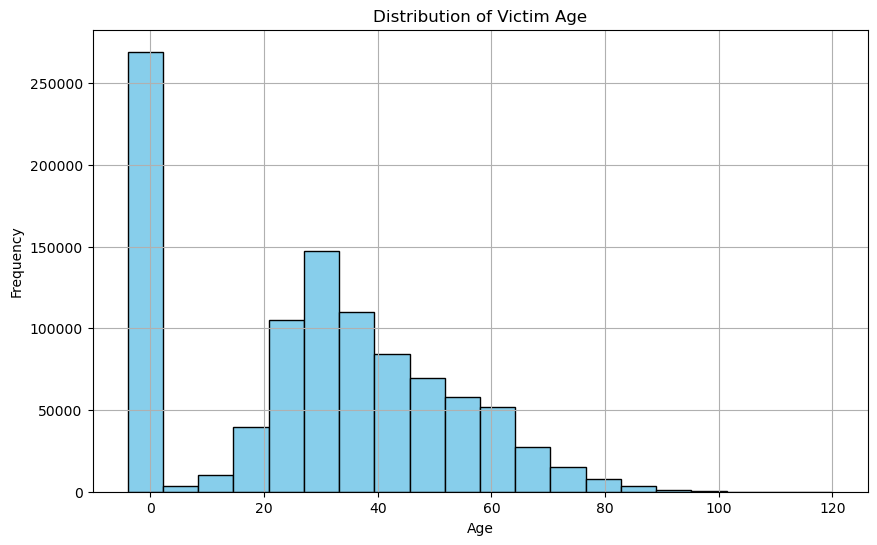

In [31]:
import matplotlib.pyplot as plt

# Plotting histogram for victim age
plt.figure(figsize=(10,6))
plt.hist(df['victim_age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [32]:
df = df[df['victim_age'] > 0]

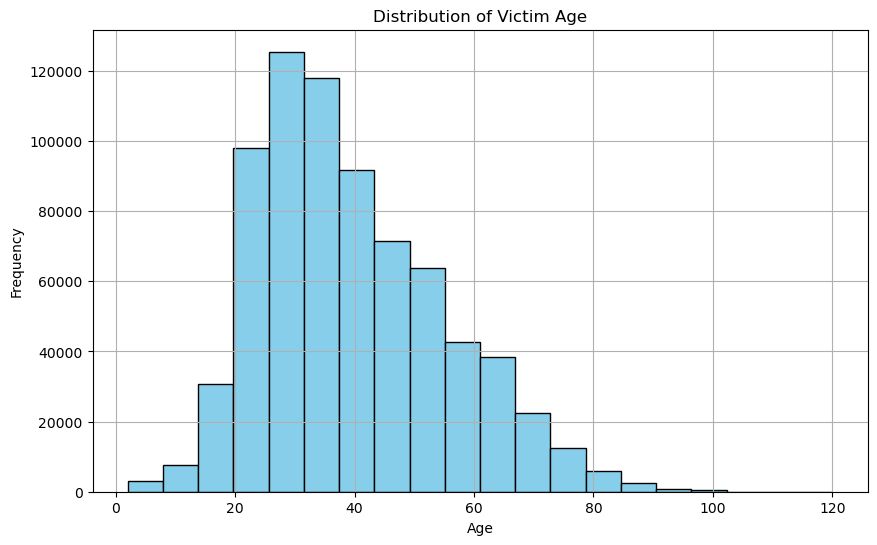

In [33]:
# Plotting histogram for victim age
plt.figure(figsize=(10,6))
plt.hist(df['victim_age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [34]:
df['victim_sex'].unique()

array(['M', 'X', 'F', 'H', 'Unknown'], dtype=object)

In [35]:
df['victim_sex'] = df['victim_sex'].replace({
    'M': 'Male',
    'F': 'Female',
    'X': 'Unknown'
})

In [36]:
df['victim_sex'].unique()

array(['Male', 'Unknown', 'Female', 'H'], dtype=object)

In [37]:
df = df[df['victim_sex'] != 'H']

In [38]:
df['victim_sex'].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [39]:
# https://lasd.org/transparency/part1and2crimedata/#part1
df.rename(columns={'part_1_2': 'part_1_2 (crime_severity)'}, inplace=True)

In [40]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,victim_descent,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,full_victim_Descent
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,O,BUS STOP/LAYOVER (ALSO QUERY 124),Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,O,CLOTHING STORE,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown
11,200406391,2020-03-02,1430,4,Hollenbeck,1,310,BURGLARY,27,Male,W,PUBLIC STORAGE,Invest Cont,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White
19,200606074,2020-02-12,1615,6,Hollywood,2,805,PIMPING,23,Female,H,STREET,Adult Arrest,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander


In [41]:
df['case_status_description'].unique()

array(['Invest Cont', 'Adult Arrest', 'Adult Other', 'Juv Arrest',
       'Juv Other', 'UNK'], dtype=object)

In [42]:
df['case_status_description'] = df['case_status_description'].replace({
    'Invest Cont': 'Investigation Continued',
    'Adult Arrest': 'Adult Arrested',
    'Adult Other': 'Adult - Other Action Taken',
    'Juv Arrest': 'Juvenile Arrested',
    'Juv Other': 'Juvenile - Other Action Taken',
    'UNK': 'Unknown'
})


In [43]:
df['case_status_description'].unique()

array(['Investigation Continued', 'Adult Arrested',
       'Adult - Other Action Taken', 'Juvenile Arrested',
       'Juvenile - Other Action Taken', 'Unknown'], dtype=object)

In [44]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,victim_descent,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,full_victim_Descent
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,O,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,O,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown
11,200406391,2020-03-02,1430,4,Hollenbeck,1,310,BURGLARY,27,Male,W,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White
19,200606074,2020-02-12,1615,6,Hollywood,2,805,PIMPING,23,Female,H,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander


In [45]:
df = df.drop(columns=['victim_descent'])
df.rename(columns={'full_victim_Descent': 'victim_descent'}, inplace = True)

In [46]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,victim_descent
1,200106753,2020-02-09,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown
2,200320258,2020-11-11,1700,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown
3,200907217,2023-05-10,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown
11,200406391,2020-03-02,1430,4,Hollenbeck,1,310,BURGLARY,27,Male,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White
19,200606074,2020-02-12,1615,6,Hollywood,2,805,PIMPING,23,Female,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander


In [47]:
df['time_of_occurrence'] = df['time_of_occurrence'].astype(str).str.zfill(4)  
df['time_of_occurrence'] = pd.to_datetime(df['time_of_occurrence'], format='%H%M').dt.time 

In [48]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,victim_descent
1,200106753,2020-02-09,18:00:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown
2,200320258,2020-11-11,17:00:00,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown
3,200907217,2023-05-10,20:37:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown
11,200406391,2020-03-02,14:30:00,4,Hollenbeck,1,310,BURGLARY,27,Male,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White
19,200606074,2020-02-12,16:15:00,6,Hollywood,2,805,PIMPING,23,Female,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735248 entries, 1 to 1004874
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   report_id                  735248 non-null  int64         
 1   date_reported              735248 non-null  datetime64[ns]
 2   time_of_occurrence         735248 non-null  object        
 3   area_code                  735248 non-null  int64         
 4   area_name                  735248 non-null  object        
 5   part_1_2 (crime_severity)  735248 non-null  int64         
 6   crime_code                 735248 non-null  int64         
 7   crime_code_description     735248 non-null  object        
 8   victim_age                 735248 non-null  int64         
 9   victim_sex                 735248 non-null  object        
 10  premises_description       735248 non-null  object        
 11  case_status_description    735248 non-null  object      

In [50]:
!pip install holidays
import holidays

In [51]:
# Get US holidays for multiple years
us_holidays = holidays.US(years=[2020, 2021, 2022, 2023, 2024, 2025])

# Create the 'holiday' column based on both national holidays and weekends
df['holiday'] = df['date_of_occurrence'].dt.date.isin(us_holidays.keys()) | (df['date_of_occurrence'].dt.weekday >= 5)

# Replace True/False with "Holiday" and "Working day"
df['holiday'] = df['holiday'].replace({True: 'Holiday', False: 'Working day'})

In [105]:
df.head()

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,victim_descent,holiday
1,200106753,2020-02-09,18:00:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown,Holiday
2,200320258,2020-11-11,17:00:00,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown,Working day
3,200907217,2023-05-10,20:37:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown,Working day
11,200406391,2020-03-02,14:30:00,4,Hollenbeck,1,310,BURGLARY,27,Male,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White,Holiday
19,200606074,2020-02-12,16:15:00,6,Hollywood,2,805,PIMPING,23,Female,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander,Working day


In [115]:
# Check unique values and their counts
df['part_1_2 (crime_severity)'].value_counts()

part_1_2 (crime_severity)
1    384296
2    350952
Name: count, dtype: int64

In [117]:
df['victim_sex'].value_counts()

victim_sex
Male       370132
Female     354624
Unknown     10492
Name: count, dtype: int64

In [119]:
df['crime_category'].value_counts()

crime_category
Theft                      359196
Violent Crime              200012
Other Crimes                96862
Uncategorized               56166
Sexual Crime                18168
Fraud & Financial Crime      4844
Name: count, dtype: int64

In [121]:
df['holiday'].value_counts()

holiday
Working day    500454
Holiday        234794
Name: count, dtype: int64

In [123]:
df['victim_descent'].value_counts()

victim_descent
Latino/Hispanic or Pacific Islander    292030
Caucasian/White                        186477
Black                                  134193
Unknown                                 81679
Asian                                   39855
Indigenous Peoples                       1014
Name: count, dtype: int64

In [125]:
df['case_status_description'].value_counts()

case_status_description
Investigation Continued          565604
Adult - Other Action Taken        99627
Adult Arrested                    65999
Juvenile Arrested                  2470
Juvenile - Other Action Taken      1543
Unknown                               5
Name: count, dtype: int64

In [127]:
df = df[df['case_status_description'] != 'Unknown']
df['case_status_description'].value_counts()

case_status_description
Investigation Continued          565604
Adult - Other Action Taken        99627
Adult Arrested                    65999
Juvenile Arrested                  2470
Juvenile - Other Action Taken      1543
Name: count, dtype: int64

In [129]:
df.head(10)

,report_id,date_reported,time_of_occurrence,area_code,area_name,part_1_2 (crime_severity),crime_code,crime_code_description,victim_age,victim_sex,premises_description,case_status_description,location,latitude,longitude,date_of_occurrence,crime_category,victim_descent,holiday
1,200106753,2020-02-09,18:00:00,1,Central,1,330,BURGLARY FROM VEHICLE,47,Male,BUS STOP/LAYOVER (ALSO QUERY 124),Investigation Continued,1000 S FLOWER ST,34.0444,-118.2628,2020-02-08,Theft,Unknown,Holiday
2,200320258,2020-11-11,17:00:00,3,Southwest,1,480,BIKE - STOLEN,19,Unknown,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Investigation Continued,1400 W 37TH ST,34.0210,-118.3002,2020-11-04,Theft,Unknown,Working day
3,200907217,2023-05-10,20:37:00,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,Male,CLOTHING STORE,Investigation Continued,14000 RIVERSIDE DR,34.1576,-118.4387,2020-03-10,Theft,Unknown,Working day
11,200406391,2020-03-02,14:30:00,4,Hollenbeck,1,310,BURGLARY,27,Male,PUBLIC STORAGE,Investigation Continued,4500 HUNTINGTON DR,34.0881,-118.1877,2020-03-01,Theft,Caucasian/White,Holiday
19,200606074,2020-02-12,16:15:00,6,Hollywood,2,805,PIMPING,23,Female,STREET,Adult Arrested,HOLLYWOOD,34.1016,-118.3370,2020-02-07,Sexual Crime,Latino/Hispanic or Pacific Islander,Working day
23,201000767,2020-07-14,20:00:00,10,West Valley,1,330,BURGLARY FROM VEHICLE,41,Male,PARKING LOT,Adult Arrested,18600 HATTERAS ST,34.1774,-118.5387,2020-07-13,Theft,Caucasian/White,Working day
43,201106871,2020-03-04,21:30:00,11,Northeast,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),50,Male,STREET,Investigation Continued,6100 DELPHI ST,34.1241,-118.1878,2020-03-02,Other Crimes,Latino/Hispanic or Pacific Islander,Working day
44,200111627,2020-05-12,22:00:00,1,Central,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,30,Female,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Arrested,700 N HILL PL,34.0618,-118.2424,2020-05-10,Violent Crime,Caucasian/White,Holiday
46,201225656,2020-12-02,22:45:00,12,77th Street,1,210,ROBBERY,21,Male,STREET,Investigation Continued,SAN PEDRO,33.9610,-118.2695,2020-12-02,Theft,Latino/Hispanic or Pacific Islander,Working day
47,200309451,2020-04-04,12:10:00,3,Southwest,1,310,BURGLARY,19,Unknown,GAS STATION,Investigation Continued,3700 S LA BREA AV,34.0199,-118.3556,2020-04-04,Theft,Unknown,Holiday


In [133]:
df.to_csv(r'C:\Users\tanzi\Personal Projects\Crime-analysis-and-prediction\crime-analysis-and-prediction\data\processed_bi.csv', index=False)